In [135]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklego.linear_model import LowessRegression
from sklearn import decomposition

In [136]:
data = pd.read_csv("../Dataset/Chen2019/data.csv")

In [137]:
table = data.iloc[:, 1:].transpose()
table.index = list(range(len(table)))
mirnas = data.iloc[:, 0]

In [138]:
table = table.drop([1, 4, 20])

In [139]:
table.head()

,0,1,2,3,4,5,6,7,8,9,...,1499,1500,1501,1502,1503,1504,1505,1506,1507,1508
0,306.514630,6504.479293,0.0,36055.276130,0.0,1273.827034,2814.361604,1228.048875,0.0,177.141572,...,332.389242,1.990355,25.874612,0.0,67.672061,0.0,340.350661,28802.423460,77.623835,1570.389891
2,142.481447,9437.584674,0.0,22678.699510,0.0,1381.345556,1388.590375,912.847238,0.0,84.522892,...,251.153738,2.414940,16.904578,0.0,21.734458,0.0,106.257351,46127.764800,7.244819,1714.607246
3,196.808885,1307.373304,0.0,11133.759750,0.0,267.097772,98.404442,238.982217,0.0,14.057777,...,323.328882,14.057777,0.000000,0.0,70.288887,0.0,112.462220,4470.373234,14.057777,140.577775
5,0.000000,3172.157520,0.0,15241.461610,0.0,619.325992,1253.757496,226.582680,0.0,30.211024,...,15.105512,15.105512,0.000000,0.0,0.000000,0.0,0.000000,12688.630080,75.527560,1676.711832
6,9.848239,1624.959376,0.0,6568.775175,0.0,502.260171,1940.103013,68.937670,0.0,19.696477,...,167.420057,9.848239,0.000000,0.0,0.000000,0.0,226.509489,17086.694040,0.000000,669.680228


In [140]:
sick = np.array(["cancer" in k for k in data.columns[1:]])
sick = np.delete(sick, [1, 4, 20])
controls = 1 - sick

In [141]:
sick

array([False, False, False, False, False, False, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
       False, False, False, False, False, False, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
       False, False, False, False, False, False, False, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True])

In [142]:
def get_means_and_variances(table):
    return np.mean(table), np.var(table, ddof=1)

In [143]:
def mean_variance_plot(table):
    means, variances = get_means_and_variances(table)
    plt.scatter(means, variances)
    plt.xlabel("mean")
    plt.ylabel("variance")
    plt.plot()

In [144]:
def mean_std_plot(table):
    means, variances = get_means_and_variances(table)
    plt.scatter(means, np.sqrt(variances))
    plt.xlabel("mean")
    plt.ylabel("std dev")
    plt.plot()

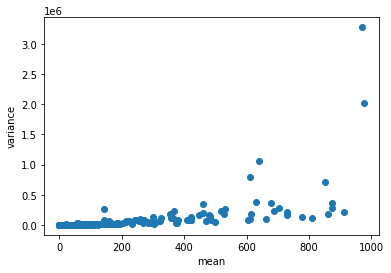

In [145]:
mean_variance_plot(table.loc[:, np.mean(table) < 1000])

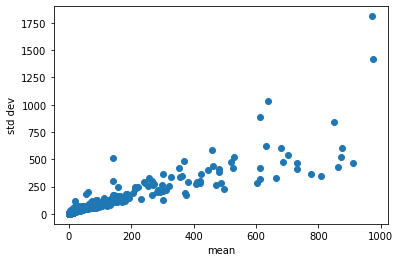

In [146]:
mean_std_plot(table.loc[:, np.mean(table) < 1000])

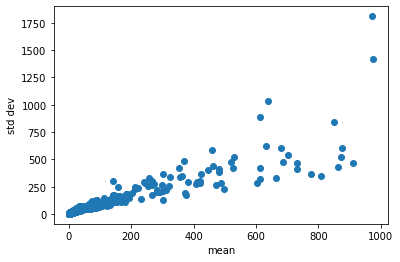

In [147]:
mean_std_plot(table.loc[:, np.logical_and(np.mean(table) < 1000, 3 * np.mean(table) > np.std(table))])

In [148]:
len(3 * np.mean(table) > np.std(table)), len(mirnas)

(1509, 1509)

In [149]:
mask = 3 * np.mean(table) > np.std(table)
table = table.loc[:, mask]
mirnas = mirnas[mask]

### Log transformation

In [150]:
log_table = np.log2(table + 1)

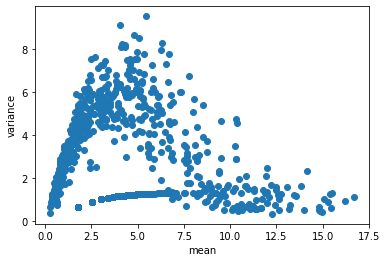

In [151]:
mean_variance_plot(log_table)

In [152]:
mask = np.mean(log_table) > 5
log_table = log_table.loc[:, mask]
mirnas = mirnas[mask]

### Loess regression

In [153]:
lowess = LowessRegression(sigma=1, span=0.1)

In [154]:
means, variances = get_means_and_variances(log_table)
lowess.fit(means.to_numpy().reshape(-1,1), variances)

LowessRegression(span=0.1)

In [155]:
x_axis = np.linspace(-2, 14, 100)
y_axis = lowess.predict(x_axis.reshape(-1,1))

[]

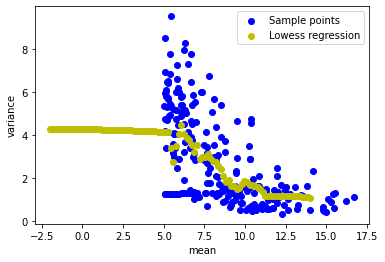

In [156]:
plt.scatter(means, variances, color="b")
plt.scatter(x_axis, y_axis, color="y")
plt.xlabel("mean")
plt.ylabel("variance")
plt.legend(["Sample points", "Lowess regression"])
plt.plot()

### Lowess normalization

In [157]:
adj_var = lowess.predict(means.to_numpy().reshape(-1, 1))

In [158]:
log_table /= np.sqrt(adj_var)

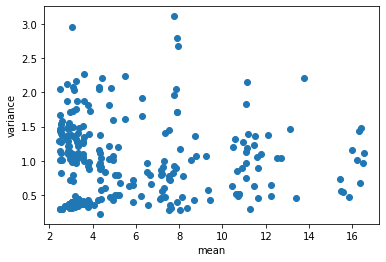

In [159]:
mean_variance_plot(log_table)

In [160]:
norm_log_table = log_table - np.mean(log_table)

In [161]:
norm_log_table /= np.sqrt(np.mean(np.var(norm_log_table, ddof=1)))

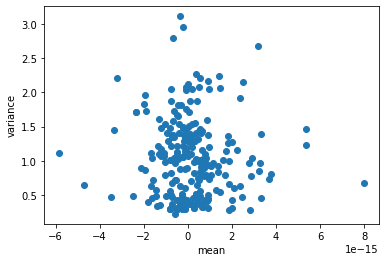

In [162]:
mean_variance_plot(norm_log_table)

# PCA

In [163]:
pca = decomposition.PCA(n_components=2)

In [164]:
pca.fit(norm_log_table)

PCA(n_components=2)

In [165]:
components = pca.transform(norm_log_table)

In [166]:
components

array([[ -4.46985057,   6.76346486],
       [  1.01149352,   4.16239309],
       [ 30.62635519,  -0.54616775],
       [ 22.77852938,  16.32579604],
       [ 15.01687839,  13.16571172],
       [ 30.38083417,  -2.26373863],
       [  4.99278918,   2.579732  ],
       [ -4.31824172,   3.22049398],
       [  2.4858075 ,  -0.41606742],
       [  9.06684459,  -5.05453075],
       [ -1.3309446 ,   1.21176614],
       [  5.25852219,  -2.12168924],
       [  5.92215989,   0.22791822],
       [ 11.99168797,   0.30535348],
       [  9.87502389,   9.47436639],
       [ -6.40279194,   6.39438483],
       [  0.78609575,  -3.97343811],
       [ -9.23184818,   0.31078805],
       [ -5.95289858,  -0.25274121],
       [ -1.61078871,  -7.27571358],
       [ -7.62991735,  -2.80129744],
       [ -8.87444131,   5.77565082],
       [ -8.69026343,   6.01632878],
       [  1.25288131,  -6.94267881],
       [ -3.5056974 ,   1.7570714 ],
       [ -9.11794726,  -1.83134428],
       [ -4.11600214,  -4.05560229],
 

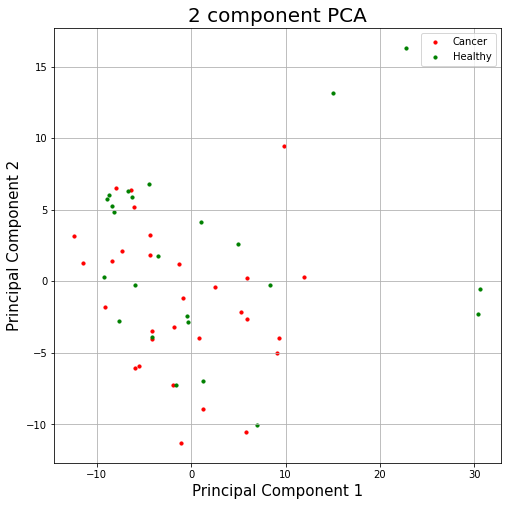

In [167]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)

ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['Cancer', 'Healthy']
colors = ['r', 'g']
ax.scatter(components[controls == False, 0], components[controls == False, 1], c = 'r', s = 10)
ax.scatter(components[controls == True, 0], components[controls == True, 1], c = 'g', s = 10)
ax.legend(targets)
ax.grid()

In [168]:
np.nonzero(components[:, 0] > 30)

(array([2, 5], dtype=int64),)

### Export dataset

In [169]:
from Scripts import converters

In [170]:
mirnas[0]

'hsa-let-7a-3p'

In [171]:
sequences = converters.canonical_to_seq(mirnas)

In [172]:
sequences[:10]

['CUAUACAAUCUACUGUCUUUC',
 'UGAGGUAGUAGGUUGUAUAGUU',
 'UGAGGUAGUAGGUUGUGUGGUU',
 'UGAGGUAGUAGGUUGUAUGGUU',
 'CUAUACGACCUGCUGCCUUUCU',
 'AGAGGUAGUAGGUUGCAUAGUU',
 'UGAGGUAGGAGGUUGUAUAGUU',
 'UGAGGUAGUAGAUUGUAUAGUU',
 'UGAGGUAGUAGUUUGUACAGUU',
 'UGAGGUAGUAGUUUGUGCUGUU']

In [173]:
sequences = np.array(sequences)
mirnas[sequences == "ACAGUAGUCUGCACAUUGGUUA"]

254    hsa-miR-199a-3p
256    hsa-miR-199b-3p
Name: miRNA, dtype: object

In [174]:
np.nonzero([sequences == "ACAGUAGUCUGCACAUUGGUUA"])

(array([0, 0], dtype=int64), array([82, 83], dtype=int64))

In [175]:
sequences = np.delete(sequences, [71])
norm_log_table = norm_log_table.drop(norm_log_table.columns[71], 1)

C:\Users\OLEFRE~1\AppData\Local\Temp/ipykernel_10776/890718696.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  norm_log_table = norm_log_table.drop(norm_log_table.columns[71], 1)


In [176]:
norm_log_table.columns = sequences
norm_log_table["cancer"] = sick
norm_log_table.head()

,CUAUACAAUCUACUGUCUUUC,UGAGGUAGUAGGUUGUAUAGUU,UGAGGUAGUAGGUUGUGUGGUU,UGAGGUAGUAGGUUGUAUGGUU,CUAUACGACCUGCUGCCUUUCU,AGAGGUAGUAGGUUGCAUAGUU,UGAGGUAGGAGGUUGUAUAGUU,UGAGGUAGUAGAUUGUAUAGUU,UGAGGUAGUAGUUUGUACAGUU,UGAGGUAGUAGUUUGUGCUGUU,...,UAUUGCACUCGUCCCGGCCUCC,AGGGACGGGACGCGGUGCAGUG,CAAAGUGCUGUUCGUGCAGGUAG,CACCCGGCUGUGUGCACAUGUGC,UCUUCUCUGUUUUGGCCAUGUG,UUUGGCACUAGCACAUUUUUGCU,UGAGGUAGUAAGUUGUAUUGUU,AACCCGUAGAUCCGAUCUUGUG,CACCCGUAGAACCGACCUUGCG,cancer
0,0.442163,-1.087623,0.366386,-0.881819,0.476673,-0.429933,-0.211347,-1.198235,-0.230265,-0.456518,...,0.647254,-0.030975,-0.143301,-0.187441,0.230512,0.367821,0.436160,0.806971,0.584806,False
2,-0.189918,-0.577929,-0.332145,-0.773245,-0.343388,-0.768637,-0.829533,-0.848815,-0.326981,-0.508152,...,0.717524,-0.155148,-0.879165,-0.174740,-0.010656,-0.491936,-0.518990,1.457785,0.677404,False
3,0.076321,-3.284190,-1.404024,-2.972566,-3.406724,-2.296920,-2.292778,-1.583945,-1.938411,-1.928734,...,-3.082569,1.132261,-1.965411,-3.244336,0.206718,0.396907,-0.472590,-1.767306,-1.953412,False
5,-4.307689,-2.070847,-0.930894,-1.847696,-0.461930,-2.357557,-1.678735,-2.039921,-2.050892,-2.565515,...,-3.082569,0.412417,0.060734,-3.244336,-2.386201,-2.921493,-4.376317,-0.325818,0.653849,False
6,-2.330973,-2.986569,-2.198958,-2.128128,0.044816,-3.706175,-2.024821,-2.161789,-2.606624,-1.827057,...,0.967029,-2.504413,-1.858653,0.497920,-0.359169,-2.921493,0.101419,0.085411,-0.313083,False


In [177]:
norm_log_table.to_csv("../TransformedData/Chen2019.csv", index=False)